<a href="https://colab.research.google.com/github/15021996/IPL_DataAnalysis/blob/main/Soumya_Team_3_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [2]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
matches_df = pd.read_csv(working_directory + 'matches.csv')

In [85]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [86]:
len(matches_df['id'].unique().tolist())

756

In [87]:
matches_df['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

which teams did not have normal results.

In [88]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [89]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


We can infer following information from the above operation describe().
1. The biggest win by runs is by 146 runs.
2. The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
3. 75% of the victorious teams that bat first won by a margin of 19 runs.
4. 75% of the victorious teams that bat second won by a margin of 6 wickets.

* To know null values in the dataframe.

In [90]:
matches_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

1. Which city maximum matches were played?

In [91]:

matches_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Ranchi              7
Abu Dhabi           7
Cape Town           7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

Maximun number of matches were played in Mumbai.

2.The Number of matches played in each season?

In [136]:
matches_per_season = matches_df.groupby('Season').id.count()

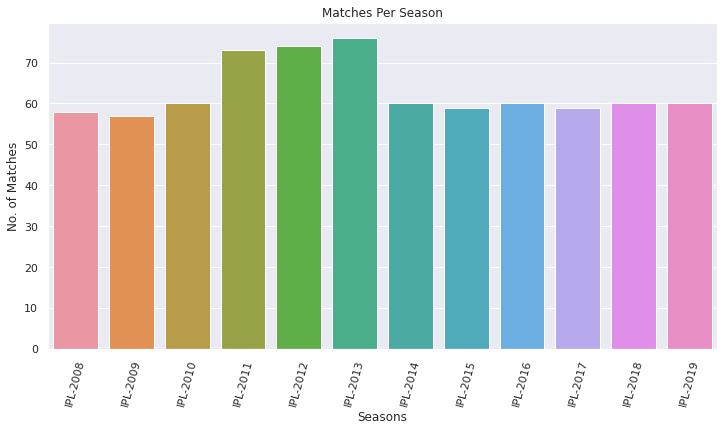

In [137]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Matches Per Season')
match_per_season_plot = sns.barplot(x = matches_per_season.index, y = matches_per_season)
match_per_season_plot.set(xlabel = 'Seasons', ylabel = 'No. of Matches');

The maximum matches played is in the year 2013 because there are 9 teams participated in this year.The least number of matches played is 57 in the year 2009.


3.Match Winners based on Year?

In [93]:
teams_per_season = matches_df.groupby('Season')['winner'].value_counts()
teams_per_season

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [94]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():
  print(items)
  extract_year = items[0][0].split('-')    
  if int(extract_year[1])==year:
    print(items[0][0])
    win_series = {
            'year': items[0][0],
            'team': items[0][1],
            'wins': items[1]}
    win_per_season_df = win_per_season_df.append(win_series,ignore_index=True)
    year = year + 1

(('IPL-2008', 'Rajasthan Royals'), 13)
IPL-2008
(('IPL-2008', 'Kings XI Punjab'), 10)
(('IPL-2008', 'Chennai Super Kings'), 9)
(('IPL-2008', 'Delhi Daredevils'), 7)
(('IPL-2008', 'Mumbai Indians'), 7)
(('IPL-2008', 'Kolkata Knight Riders'), 6)
(('IPL-2008', 'Royal Challengers Bangalore'), 4)
(('IPL-2008', 'Deccan Chargers'), 2)
(('IPL-2009', 'Delhi Daredevils'), 10)
IPL-2009
(('IPL-2009', 'Deccan Chargers'), 9)
(('IPL-2009', 'Royal Challengers Bangalore'), 9)
(('IPL-2009', 'Chennai Super Kings'), 8)
(('IPL-2009', 'Kings XI Punjab'), 7)
(('IPL-2009', 'Rajasthan Royals'), 6)
(('IPL-2009', 'Mumbai Indians'), 5)
(('IPL-2009', 'Kolkata Knight Riders'), 3)
(('IPL-2010', 'Mumbai Indians'), 11)
IPL-2010
(('IPL-2010', 'Chennai Super Kings'), 9)
(('IPL-2010', 'Deccan Chargers'), 8)
(('IPL-2010', 'Royal Challengers Bangalore'), 8)
(('IPL-2010', 'Delhi Daredevils'), 7)
(('IPL-2010', 'Kolkata Knight Riders'), 7)
(('IPL-2010', 'Rajasthan Royals'), 6)
(('IPL-2010', 'Kings XI Punjab'), 4)
(('IPL-2011'

In [96]:
win_per_season_df

,year,team,wins
0,IPL-2008,Rajasthan Royals,13
1,IPL-2009,Delhi Daredevils,10
2,IPL-2010,Mumbai Indians,11
3,IPL-2011,Chennai Super Kings,11
4,IPL-2012,Kolkata Knight Riders,12
5,IPL-2013,Mumbai Indians,13
6,IPL-2014,Kings XI Punjab,12
7,IPL-2015,Chennai Super Kings,10
8,IPL-2016,Sunrisers Hyderabad,11
9,IPL-2017,Mumbai Indians,12


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


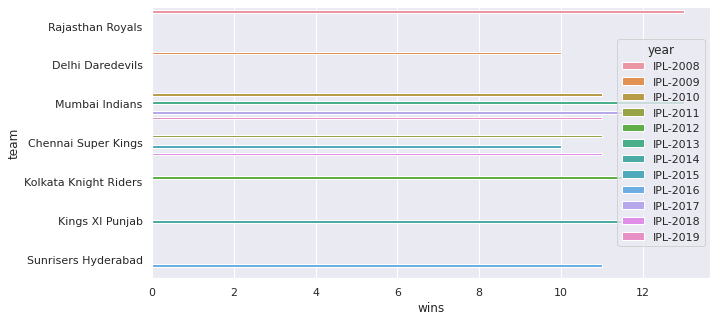

In [97]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df);

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).

Observations:
Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

One better way to analyse winning team is to fond out the win percentage.

In [139]:
total_matches_played = (matches_df.team2.value_counts() + matches_df.team1.value_counts()).sort_values(ascending = False)
total_matches_played

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

In [141]:
most_wins = matches_df.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [142]:
win_percentage = (most_wins / total_matches_played).sort_values(ascending = False) * 100
win_percentage

Rising Pune Supergiant         62.500000
Delhi Capitals                 62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

[Text(20.19999999999999, 0.5, 'Teams'),
 Text(0.5, 20.200000000000003, 'Percentage')]

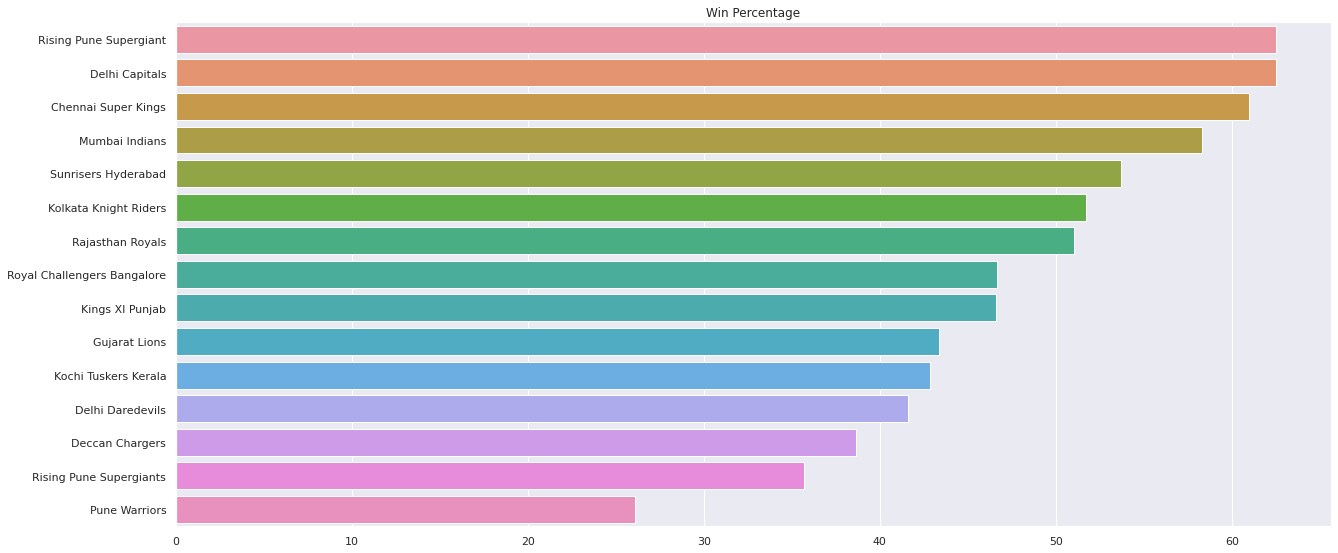

In [144]:
plt.title('Win Percentage')
win_percentage_plot = sns.barplot(y = win_percentage.index, x = win_percentage)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'Percentage')

Win percentage is highest for Rising Pune Supergiants.

Now finding the consistency of each team over the IPL years.

In [146]:
matches_won_each_season = pd.crosstab(matches_df['winner'], matches_df['Season'])

In [147]:
matches_won_each_season

Season,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015,IPL-2016,IPL-2017,IPL-2018,IPL-2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


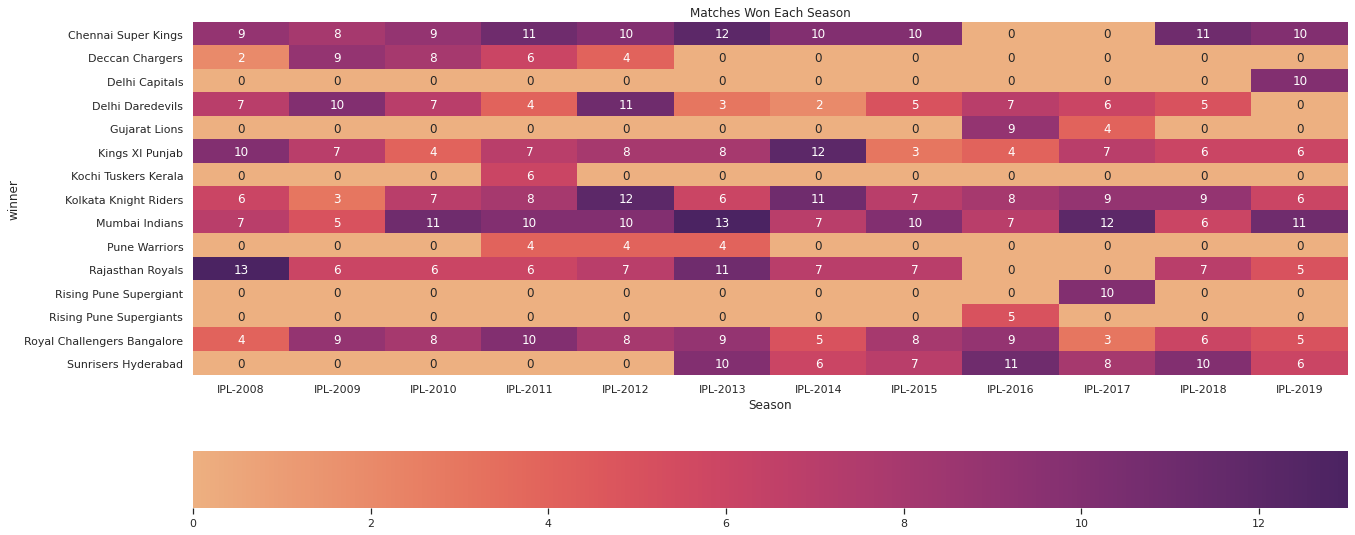

In [148]:
plt.xlabel('Seasons')
plt.ylabel('Teams')
plt.title('Matches Won Each Season')
sns.heatmap(matches_won_each_season, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"})

In [98]:
venue_ser = matches_df['venue'].value_counts()

In [99]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [100]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


There are total 40 venues.

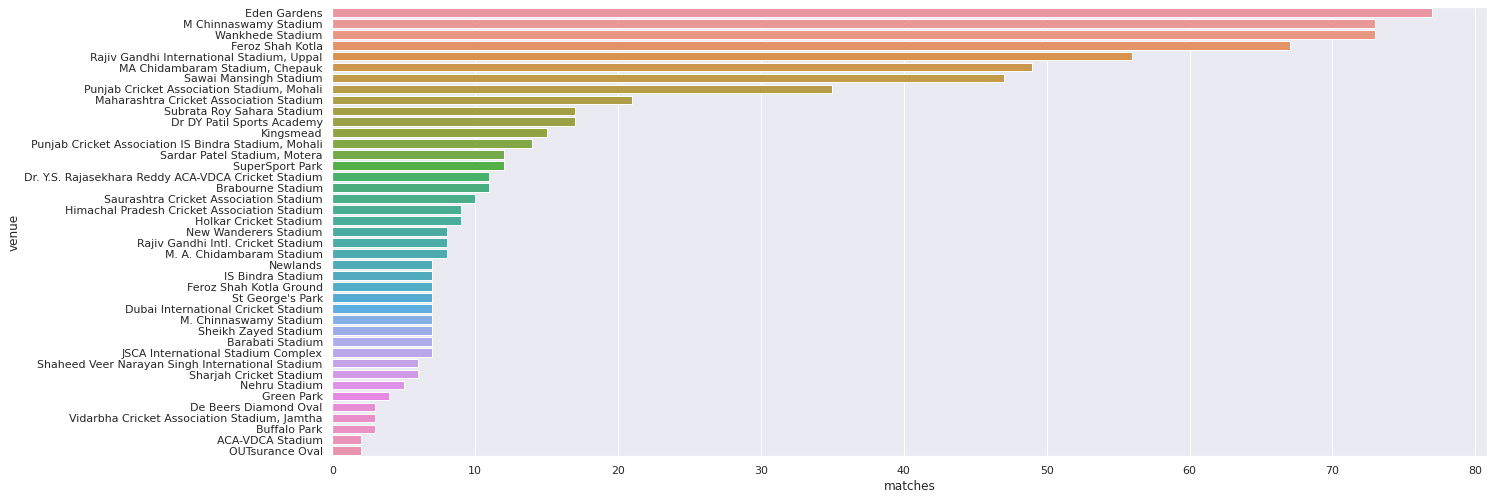

In [102]:

sns.barplot(x='matches', y='venue', data=venue_df);
sns.set(rc={'figure.figsize':(20.7,9.27)})

*Eden Gardens has hosted the maximum number of IPL matches.It has the largest capacity.


4.The player who has won the player_of_match title on most occasions is the most valuable player.



In [21]:
man_of_the_match_ser = matches_df['player_of_match'].value_counts()
man_of_the_match_ser

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
                  ..
DL Vettori         1
TA Boult           1
SB Wagh            1
A Joseph           1
MS Gony            1
Name: player_of_match, Length: 226, dtype: int64

In [22]:
man_of_the_match_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in man_of_the_match_ser.iteritems():
    if count>10:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        man_of_the_match_df = man_of_the_match_df.append(temp_df2, ignore_index=True)
        count += 1

In [23]:
man_of_the_match_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


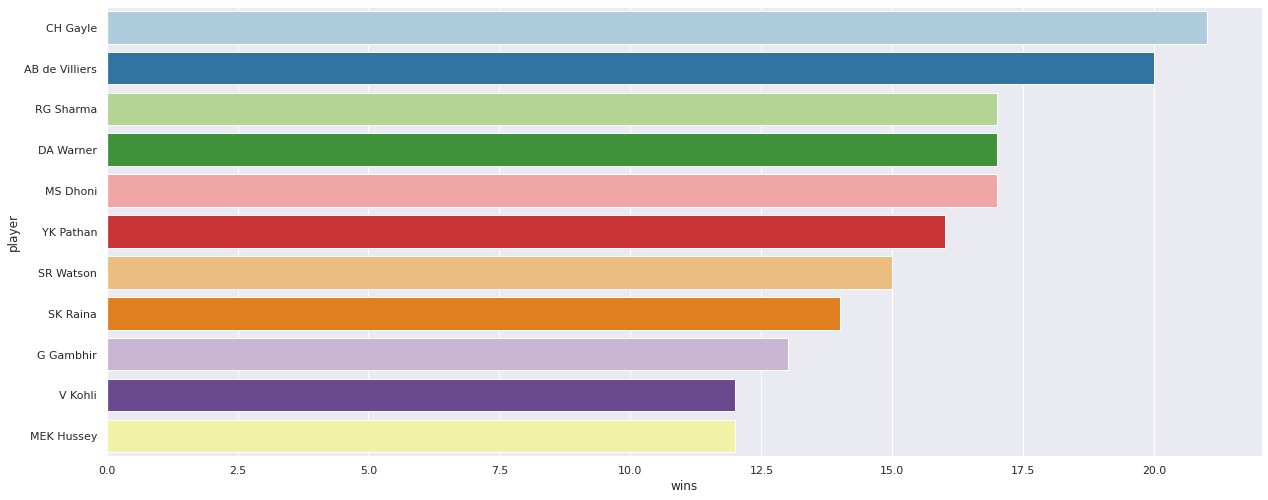

In [24]:
sns.barplot(x='wins', y='player', data=man_of_the_match_df, palette='Paired');

Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.



1.   Which team has won the toss maximum time?
2.   Does winning the toss give any advantage over the other team?




In [25]:
matches_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [26]:
toss_ser = matches_df['toss_winner'].value_counts()

In [27]:
toss_winner_df = pd.DataFrame(columns=['team', "wins"])
count = 0
for items in man_of_the_match_ser.iteritems():
    if count>10:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        man_of_the_match_df = man_of_the_match_df.append(temp_df2, ignore_index=True)
        count += 1

In [28]:
win_count = 0
for index, value in matches_df.iterrows():
    if(value['toss_winner']==value['winner']):
        # print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')

The number of times the team winning toss have won: 393


In [29]:
probability = win_count/len(matches_df)
probability

0.5198412698412699

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


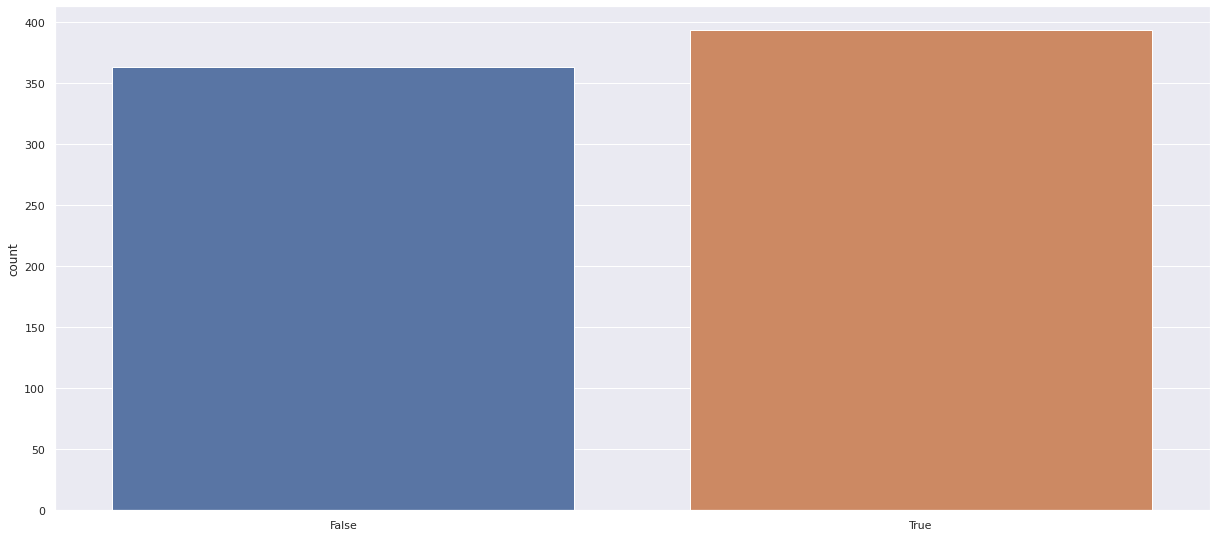

In [134]:
ss = matches_df['toss_winner'] == matches_df['winner']
sns.countplot(ss)


This implies that 51.9% of the times when a team won the toss, it had won the match as well.So, it shows that the toss winning has hardly any advantage over the other team.

In [30]:
win_by_field = 0
win_by_bat = 0
for index,value in matches_df.iterrows():
  if (value['toss_decision']=='field') and (value['toss_winner']==value['winner']):
    win_by_field +=1
  if (value['toss_decision']=='bat') and (value['toss_winner']==value['winner']):
    win_by_bat +=1

In [31]:
print(f'The number of times the team winning toss have won when chosen to field: {win_by_field}')
print(f'The number of times the team winning toss have won when chosen to bat: {win_by_bat}')

The number of times the team winning toss have won when chosen to field: 259
The number of times the team winning toss have won when chosen to bat: 134


In [32]:
prob_of_winning_when_toss_won_and_chose_field = win_by_field/len(matches_df)
prob_of_winning_when_toss_won_and_chose_bat = win_by_bat/len(matches_df)

In [33]:
prob_of_winning_when_toss_won_and_chose_field


0.3425925925925926

In [34]:
prob_of_winning_when_toss_won_and_chose_bat

0.17724867724867724



*   From the above operation we can conclude that, whenever a team has won the toss,and had chosen to field ,they had an edge over the team which took the other decision



* Which umpire has officiated the most number of IPL matches on-field?  

In [35]:
umpire1_ser = matches_df['umpire1'].value_counts()
umpire2_ser = matches_df['umpire2'].value_counts()

In [36]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [37]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    # print(items)
    temp_df1 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df1, ignore_index=True) 

In [38]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
60,SJA Taufel,55.0




* S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by HDPK Dharmasena.
* Sundaram Ravi (born 22 April 1966) is an Indian cricket umpire from who was a member of the ICC Elite Panel of Umpires between 2015 and 2019. 



In [128]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [ ]:
Mumbai Indians won by maximum runs.

In [130]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

KKR won by max wickets.

In [39]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
Players_df = pd.read_excel(working_directory + 'Players.xlsx')

In [40]:
Players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [41]:
Players_df.tail()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India
565,Z Khan,1978-10-07,Right_Hand,Left-arm fast-medium,India


In [42]:
Players_df['Player_Name'].unique()

array(['A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary',
       'A Dananjaya', 'A Flintoff', 'A Hales', 'A Joseph', 'A Kumble',
       'A Mishra', 'A Mithun', 'A Mukund', 'A Nehra', 'A Nel', 'A Roy',
       'A Singh', 'A Symonds', 'A Turner', 'A Uniyal', 'A Zampa',
       'AA Bilakhia', 'AA Chavan', 'AA Jhunjhunwala', 'AA Kazi',
       'AA Noffke', 'AB Agarkar', 'AB Barath', 'AB de Villiers',
       'AB Dinda', 'AB McDonald', 'Abdur Razzak', 'AC Blizzard',
       'AC Gilchrist', 'AC Thomas', 'AC Voges', 'AD Mascarenhas',
       'AD Mathews', 'AD Nath', 'AD Russell', 'AF Milne', 'AG Murtaza',
       'AG Paunikar', 'AJ Finch', 'AJ Tye', 'AL Menaria', 'AM Nayar',
       'AM Rahane', 'AM Salvi', 'AN Ahmed', 'AN Ghosh', 'Anand Rajan',
       'Anirudh Singh', 'Ankit Sharma', 'Ankit Soni', 'Anureet Singh',
       'AP Dole', 'AP Majumdar', 'AP Tare', 'AR Bawne', 'AR Patel',
       'AS Rajpoot', 'AS Raut', 'AS Yadav', 'AT Rayudu', 'AUK Pathan',
       'AV Wankhade', 'Avesh Khan', 'Azha

In [43]:
print(Players_df.loc[Players_df['Player_Name'] == 'CH Gayle'])

    Player_Name        DOB Batting_Hand       Bowling_Skill      Country
102    CH Gayle 1979-09-21    Left_Hand  Right-arm offbreak  West Indies


From above two operations we can conclude that Cris Gayle who has been Player of the match for most of the matches is Left handed ,age is 41 years old and hails from West Indies.



In [44]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
most_runs_average_strikerate_df = pd.read_csv(working_directory + 'most_runs_average_strikerate.csv')

In [45]:
most_runs_average_strikerate_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [46]:
most_runs_average_strikerate_df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


In [47]:
most_runs_average_strikerate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [48]:
mras = most_runs_average_strikerate_df[['batsman','average']].groupby('batsman').sum().sort_values(by = 'average',ascending = False)
mras.iloc[:6]

,average
batsman,
Iqbal Abdulla,88.000000
J Bairstow,57.375000
MN van Wyk,55.666667
PD Collingwood,50.750000
HM Amla,44.384615
AB de Villiers,42.442308


Above are the batsman with highest average.

In [49]:
most_runs_average_strikerate_df.sort_values(['strikerate'],ascending=False).head()

,batsman,total_runs,out,numberofballs,average,strikerate
443,B Stanlake,5,0,2,NaN,250.000000
449,KMDN Kulasekara,5,0,2,NaN,250.000000
301,Umar Gul,39,3,19,13.0,205.263158
462,VRV Singh,4,1,2,4.0,200.000000
461,RS Sodhi,4,0,2,NaN,200.000000


These are the top 5 batsman with best strike rate.

In [50]:
data_df = most_runs_average_strikerate_df[['batsman','total_runs','out','numberofballs','average','strikerate']]

In [51]:
corr_df = data_df.corr()
corr_df

,total_runs,out,numberofballs,average,strikerate
total_runs,1.000000,0.972650,0.995744,0.556467,0.308024
out,0.972650,1.000000,0.977280,0.506673,0.316884
numberofballs,0.995744,0.977280,1.000000,0.550079,0.292358
average,0.556467,0.506673,0.550079,1.000000,0.626234
strikerate,0.308024,0.316884,0.292358,0.626234,1.000000


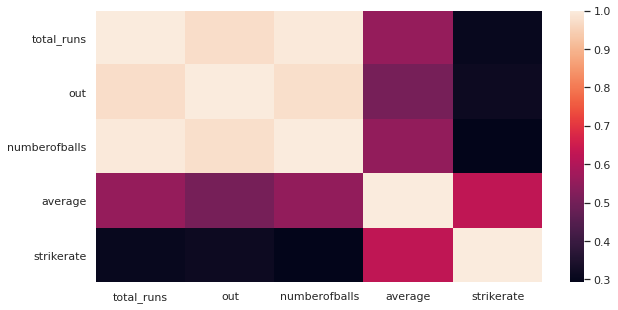

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

In [53]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
deliveries_df = pd.read_csv(working_directory + 'deliveries.csv')

In [54]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [55]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [56]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [57]:
batsmen_score = pd.DataFrame(deliveries_df.groupby(['match_id','batsman']).sum()['batsman_runs'])
batsmen_score.head()

batsman_runs
match_id batsman                  
1        A Choudhary             6
         BCJ Cutting            16
         CH Gayle               32
         DA Warner              14
         DJ Hooda               16

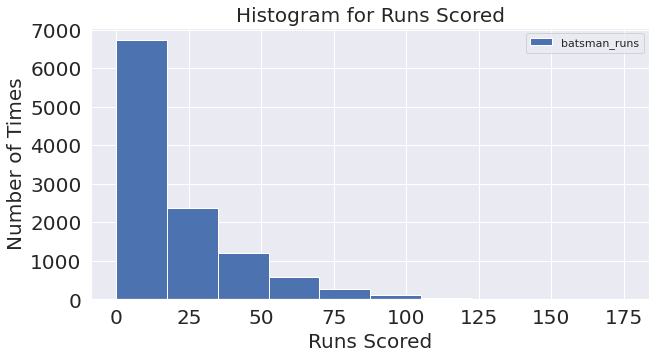

In [58]:
plt.rcParams['figure.figsize'] = 10,5
batsmen_score.plot(kind = 'hist',fontsize = 20)
plt.xlabel('Runs Scored',fontsize = 20)
plt.ylabel('Number of Times',fontsize = 20)
plt.title('Histogram for Runs Scored',fontsize = 20)
plt.show()

In [59]:
Batsman_score=deliveries_df.groupby('batsman')["batsman_runs"].agg(sum).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)

In [60]:
Top_batsman_score= Batsman_score.iloc[:10]

In [61]:
Top_batsman_score

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223




*   Virat Kohli is the batsman with highest runs.


In [62]:
Batsman_ball_faced=deliveries_df.groupby(['batsman'])["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Batsman_ball_faced_Top=Batsman_ball_faced.iloc[:11]
Batsman_ball_faced_Top

,batsman,ball
0,V Kohli,4211
1,SK Raina,4044
2,RG Sharma,3816
3,S Dhawan,3776
4,G Gambhir,3524
5,RV Uthappa,3492
6,DA Warner,3398
7,MS Dhoni,3318
8,AM Rahane,3215
9,CH Gayle,3131


* Virat Kohli has faced maximum balls.



In [126]:
aggregatedata = pd.merge(matches,deliveries, left_on = 'id',right_on = 'match_id')
aggregatedata.columns

NameError: ignored

In [125]:
batsmen_strikerate_season = pd.DataFrame(aggregatedata.groupby(['season','batsman']).agg({'batsman_runs' : 'sum','ball' : 'count'}))
batsmen_strikerate_season['Strike Rate'] = batsmen_strikerate_season['batsman_runs']/batsmen_strikerate_season['ball']*100
batsmen_strikerate_season = batsmen_strikerate_season.sort_values(by =['season','Strike Rate'] , ascending = False)
batsmen_strikerate_season.reset_index(inplace = True)
batsmen_strikerate_season[batsmen_strikerate_season['batsman_runs'] > 300].head()

NameError: ignored

In [63]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
deliveries_df = pd.read_csv(working_directory + 'deliveries.csv')

In [64]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


Which bowler has given max wide runs?

In [65]:
deliveries_df[['bowler','wide_runs']].groupby('bowler').sum().sort_values(by="wide_runs",ascending=False)

,wide_runs
bowler,
SL Malinga,152
P Kumar,144
DJ Bravo,124
R Ashwin,111
UT Yadav,110
...,...
RR Bhatkal,0
RJ Peterson,0
GR Napier,0


SL Malinga is the bowler who gave maximum wide runs during the IPLs.

In [66]:
deliveries_df[deliveries_df['is_super_over']==1]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,4,0,4,NaN,NaN,NaN
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,6,0,6,NaN,NaN,NaN
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,0,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,0,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127365,536,3,Kings XI Punjab,Rajasthan Royals,1,7,SE Marsh,GJ Maxwell,CH Morris,1,0,0,1,0,0,0,1,1,SE Marsh,run out,NaN
127366,536,4,Rajasthan Royals,Kings XI Punjab,1,1,SR Watson,JP Faulkner,MG Johnson,1,0,0,0,0,0,0,0,0,SR Watson,bowled,NaN
127367,536,4,Rajasthan Royals,Kings XI Punjab,1,2,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,1,0,4,1,5,NaN,NaN,NaN
127368,536,4,Rajasthan Royals,Kings XI Punjab,1,3,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [67]:
super_over_df = pd.DataFrame(deliveries_df,columns= ['batting_team','is_super_over'])
super_over_df.head()

,batting_team,is_super_over
0,Sunrisers Hyderabad,0
1,Sunrisers Hyderabad,0
2,Sunrisers Hyderabad,0
3,Sunrisers Hyderabad,0
4,Sunrisers Hyderabad,0


In [68]:
gkk= super_over_df[super_over_df['is_super_over']==1]

In [69]:
gkk['batting_team'].value_counts()

Rajasthan Royals               14
Kolkata Knight Riders          13
Royal Challengers Bangalore    12
Kings XI Punjab                11
Gujarat Lions                   8
Sunrisers Hyderabad             7
Delhi Daredevils                6
Mumbai Indians                  5
Chennai Super Kings             5
Name: batting_team, dtype: int64

1.By the above observation ,we can conclude that , all above teams have taken super over.
2. Rajasthan Royals have taken 14 super overs followed by Kolkata Knight Riders.




In [70]:
deliveries_df[['batting_team','batsman','batsman_runs']].groupby(['batting_team','batsman','batsman_runs']).sum().sort_values(by='batsman_runs',ascending=False)

Empty DataFrame
Columns: []
Index: [(Kolkata Knight Riders, AD Russell, 7), (Chennai Super Kings, DJ Bravo, 7), (Kolkata Knight Riders, CA Lynn, 7), (Royal Challengers Bangalore, BB McCullum, 7), (Royal Challengers Bangalore, C de Grandhomme, 7), (Sunrisers Hyderabad, Mohammad Nabi, 7), (Chennai Super Kings, MS Dhoni, 7), (Mumbai Indians, KA Pollard, 7), (Mumbai Indians, RG Sharma, 7), (Deccan Chargers, LPC Silva, 6), (Mumbai Indians, TL Suman, 6), (Delhi Daredevils, KD Karthik, 6), (Mumbai Indians, TG Southee, 6), (Kolkata Knight Riders, C de Grandhomme, 6), (Mumbai Indians, ST Jayasuriya, 6), (Royal Challengers Bangalore, S Hetmyer, 6), (Delhi Daredevils, K Rabada, 6), (Deccan Chargers, MD Mishra, 6), (Kolkata Knight Riders, CA Lynn, 6), (Sunrisers Hyderabad, NV Ojha, 6), (Mumbai Indians, SS Tiwary, 6), (Deccan Chargers, KC Sangakkara, 6), (Kolkata Knight Riders, BJ Hodge, 6), (Royal Challengers Bangalore, LRPL Taylor, 6), (Mumbai Indians, Yuvraj Singh, 6), (Delhi Daredevils, KP Pietersen, 6), (Royal Challengers Bangalore, LA Pomersbach, 6), (Sunrisers Hyderabad, DW Steyn, 6), (Mumbai Indians, Z Khan, 6), (Deccan Chargers, JP Duminy, 6), (Delhi Daredevils, KM Jadhav, 6), (Kolkata Knight Riders, B Lee, 6), (Deccan Chargers, MR Marsh, 6), (Mumbai Indians, YV Takawale, 6), (Royal Challengers Bangalore, S Rana, 6), (Kolkata Knight Riders, BB McCullum, 6), (Delhi Daredevils, KK Nair, 6), (Kolkata Knight Riders, BJ Haddin, 6), (Mumbai Indians, UBT Chand, 6), (Royal Challengers Bangalore, M Ali, 6), (Sunrisers Hyderabad, Yuvraj Singh, 6), (Mumbai Indians, SR Tendulkar, 6), (Sunrisers Hyderabad, NLTC Perera, 6), (Kolkata Knight Riders, DJ Hussey, 6), (Mumbai Indians, RR Raje, 6), (Deccan Chargers, R Sharma, 6), (Kolkata Knight Riders, EJG Morgan, 6), (Mumbai Indians, RJ Peterson, 6), (Delhi Daredevils, JA Morkel, 6), (Mumbai Indians, RG Sharma, 6), (Deccan Chargers, RG Sharma, 6), (Kolkata Knight Riders, G Gambhir, 6), (Kolkata Knight Riders, I Sharma, 6), (Mumbai Indians, RE Levi, 6), (Sunrisers Hyderabad, GH Vihari, 6), (Delhi Daredevils, J Botha, 6), (Deccan Chargers, RJ Harris, 6), (Kolkata Knight Riders, J Botha, 6), (Mumbai Indians, RT Ponting, 6), (Delhi Daredevils, JDS Neesham, 6), (Kolkata Knight Riders, AD Russell, 6), (Mumbai Indians, RV Uthappa, 6), (Mumbai Indians, SM Pollock, 6), (Kolkata Knight Riders, CA Pujara, 6), (Mumbai Indians, SL Malinga, 6), (Sunrisers Hyderabad, EJG Morgan, 6), (Mumbai Indians, SD Lad, 6), (Delhi Daredevils, JP Duminy, 6), (Deccan Chargers, PA Patel, 6), (Kolkata Knight Riders, CH Gayle, 6), (Mumbai Indians, SD Chitnis, 6), (Royal Challengers Bangalore, S Dube, 6), (Kolkata Knight Riders, CR Woakes, 6), (Deccan Chargers, PA Reddy, 6), (Delhi Daredevils, JJ Roy, 6), (Mumbai Indians, S Dhawan, 6), (Kolkata Knight Riders, DB Das, 6), (Delhi Daredevils, JR Hopes, 6), (Pune Warriors, AC Thomas, 6), (Kolkata Knight Riders, AD Mathews, 6), (Deccan Chargers, CL White, 6), (Pune Warriors, R Sharma, 6), (Delhi Daredevils, MF Maharoof, 6), (Pune Warriors, NL McCullum, 6), (Kochi Tuskers Kerala, B Akhil, 6), (Pune Warriors, MR Marsh, 6), (Royal Challengers Bangalore, SR Watson, 6), (Deccan Chargers, DB Ravi Teja, 6), (Pune Warriors, MN Samuels, 6), (Kochi Tuskers Kerala, BB McCullum, 6), (Pune Warriors, MK Pandey, 6), (Delhi Daredevils, MC Juneja, 6), (Deccan Chargers, DJ Harris, 6), (Kochi Tuskers Kerala, BJ Hodge, 6), (Kochi Tuskers Kerala, DPMD Jayawardene, 6), (Royal Challengers Bangalore, SP Goswami, 6), (Sunrisers Hyderabad, DJ Hooda, 6), (Kings XI Punjab, Yuvraj Singh, 6), (Royal Challengers Bangalore, M Vohra, 6), (Pune Warriors, RV Uthappa, 6), ...]

[4110 rows x 0 columns]

In [71]:
Batsman_fours=deliveries_df.groupby(['batsman'])["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)

In [72]:
Batsman_fours.columns = ["batsman", "No. of 4s"]
Batsman_fours.iloc[:10]

,batsman,No. of 4s
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


In [73]:
Batsman_sixes=deliveries_df.groupby("batsman")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Batsman_sixes.columns= ["batsman","No_of_6s"]
Batsman_sixes.iloc[:20,:]

,batsman,No_of_6s
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


In [74]:
Batsman_Score_by_Match= deliveries_df[["match_id","batsman","batsman_runs"]]
Batsman_Score_by_Match=Batsman_Score_by_Match.groupby(["match_id","batsman"]).sum()
Batsman_with_centuries=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=100].reset_index()
Batsman_with_centuries=Batsman_with_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Batsman_with_centuries.columns=["batsman","No_of_centuries"]
Batsman_with_centuries

,batsman,No_of_centuries
0,CH Gayle,7
1,V Kohli,5
2,DA Warner,4
3,SR Watson,4
4,AB de Villiers,3
5,HM Amla,2
6,AC Gilchrist,2
7,AM Rahane,2
8,V Sehwag,2
9,BB McCullum,2


CH Gayke has made maximum centuries during the IPL

In [75]:
Batsman_with_Half_centuries=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=50].reset_index()
Batsman_with_Half_centuries=Batsman_with_Half_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Batsman_with_Half_centuries_top=Batsman_with_Half_centuries[Batsman_with_Half_centuries["match_id"]>=10]
Batsman_with_Half_centuries_top.columns = ["batsman","No_of_half_centuries"]
Batsman_with_Half_centuries_top

,batsman,No_of_half_centuries
0,DA Warner,48
1,V Kohli,43
2,SK Raina,39
3,S Dhawan,37
4,RG Sharma,37
5,AB de Villiers,37
6,G Gambhir,36
7,CH Gayle,35
8,AM Rahane,29
9,RV Uthappa,24


DA Warner has made max half centuries during the IPL.

In [76]:
Bowler_wicket = deliveries_df[deliveries_df["dismissal_kind"] != "run out"]
Bowler_wicket= Bowler_wicket[["bowler","player_dismissed"]]
Bowler_wicket = Bowler_wicket.dropna()
Bowler_wicket= Bowler_wicket.groupby("bowler")["player_dismissed"].count().reset_index().sort_values(by="player_dismissed",ascending=False).reset_index(drop=True)
Bowler_wicket.columns=["bowler","Wickets"]
Bowler_wicket.iloc[:6]

,bowler,Wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133


Top 6 bowlers who took max wickets are found above.

In [77]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
teamwise_home_and_away_df = pd.read_csv(working_directory + 'teamwise_home_and_away.csv')

In [78]:
teamwise_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [79]:
teamwise_home_and_away_df.describe()

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


In [80]:
home_wins = teamwise_home_and_away_df[['team','home_wins']].groupby('team').sum().sort_values(by="home_wins",ascending=False)
home_wins

,home_wins
team,
Mumbai Indians,58
Chennai Super Kings,51
Kings XI Punjab,38
Royal Challengers Bangalore,35
Kolkata Knight Riders,34
Sunrisers Hyderabad,30
Rajasthan Royals,29
Delhi Daredevils,25
Deccan Chargers,18


Mumbai Indians had maximum home_wins.

In [81]:
home_matches = teamwise_home_and_away_df[['team','home_matches']].groupby('team').sum().sort_values(by="home_matches",ascending=False)
home_matches

,home_matches
team,
Mumbai Indians,101
Kings XI Punjab,91
Chennai Super Kings,89
Royal Challengers Bangalore,85
Kolkata Knight Riders,83
Delhi Daredevils,72
Rajasthan Royals,67
Sunrisers Hyderabad,63
Deccan Chargers,43


In [82]:
away_wins = teamwise_home_and_away_df[['team','away_wins']].groupby('team').sum().sort_values(by="away_wins",ascending=False)
away_wins

,away_wins
team,
Kolkata Knight Riders,58
Mumbai Indians,51
Chennai Super Kings,49
Royal Challengers Bangalore,49
Rajasthan Royals,46
Kings XI Punjab,44
Delhi Daredevils,42
Sunrisers Hyderabad,28
Gujarat Lions,12


Max away wins were for Kolkata Knight Riders.

In [83]:
away_matches = teamwise_home_and_away_df[['team','away_matches']].groupby('team').sum().sort_values(by="away_matches",ascending=False)
away_matches

,away_matches
team,
Kolkata Knight Riders,95
Royal Challengers Bangalore,95
Delhi Daredevils,89
Mumbai Indians,86
Kings XI Punjab,85
Rajasthan Royals,80
Chennai Super Kings,75
Sunrisers Hyderabad,45
Deccan Chargers,32
